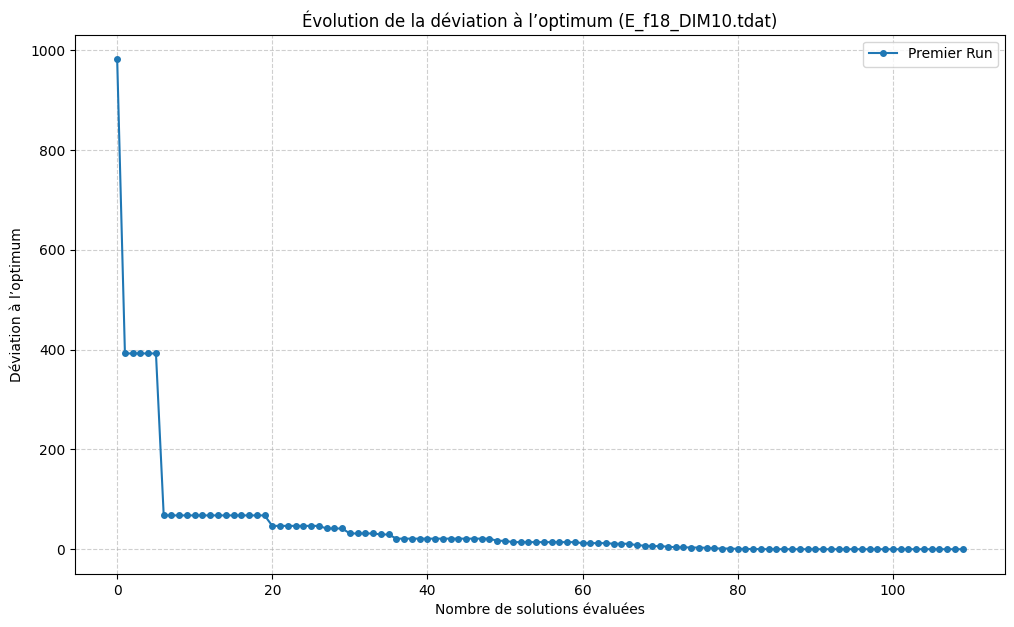

In [1]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

def extract_numbers_from_line(line):
    """Extrait tous les nombres d'une ligne sous forme de float."""
    return [float(num) for num in re.findall(r'-?\d+\.?\d*(?:[eE][-+]?\d+)?', line)]

def extract_first_run(file_path):
    """Extrait uniquement le premier run du fichier."""
    try:
        with open(file_path, 'r') as file:
            best = []

            for line in file:
                if line.startswith('%'):
                    if best:
                        return best  # Retourne immédiatement le premier run
                else:
                    numbers = extract_numbers_from_line(line)
                    if len(numbers) >= 3:
                        best.append(numbers[2])

        return best  # Retourne ce qui a été trouvé, même si le fichier contient un seul run

    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' est introuvable.")
        return []

def plot_first_run(file_path, best_fitness):
    """Affiche uniquement le premier run extrait."""
    if not best_fitness:
        print(f"Aucune donnée valide pour '{file_path}', affichage annulé.")
        return

    file_name = os.path.basename(file_path)  # Extrait uniquement le nom du fichier

    plt.figure(figsize=(12, 7))
    plt.plot(best_fitness, marker='o', linestyle='-', markersize=4, label="Premier Run")
    plt.title(f"Évolution de la déviation à l’optimum ({file_name})")
    plt.xlabel("Nombre de solutions évaluées")
    plt.ylabel("Déviation à l’optimum")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Définition du fichier à analyser
file_path = "EDA_PSO/E_f18_DIM10.tdat"

# Extraction du premier run
first_run = extract_first_run(file_path)

# Affichage du graphe du premier run
plot_first_run(file_path, first_run)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Traitement de 'E_f18_DIM10.tdat'...


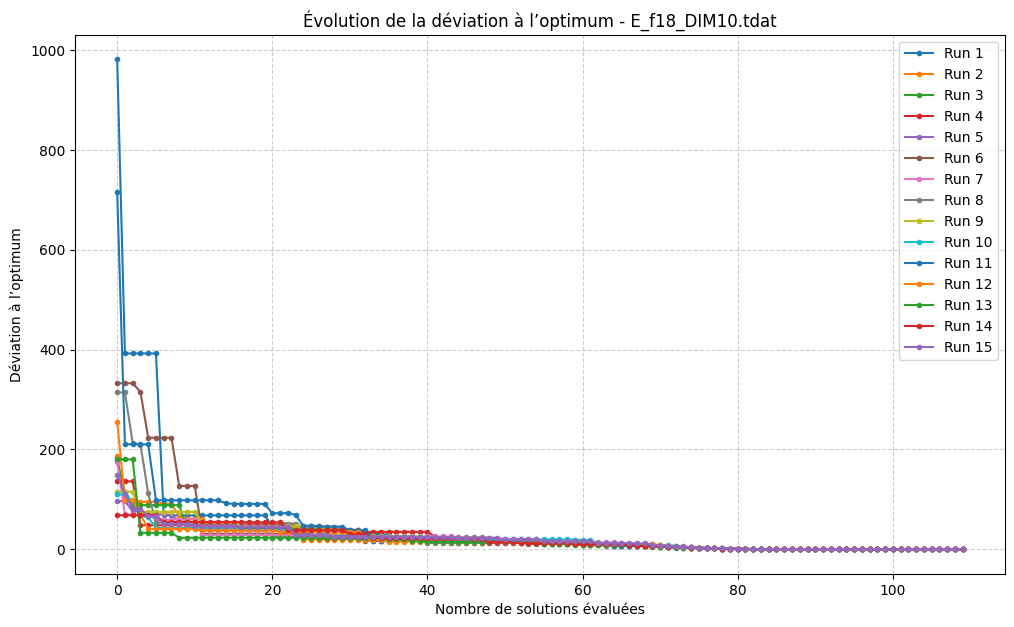

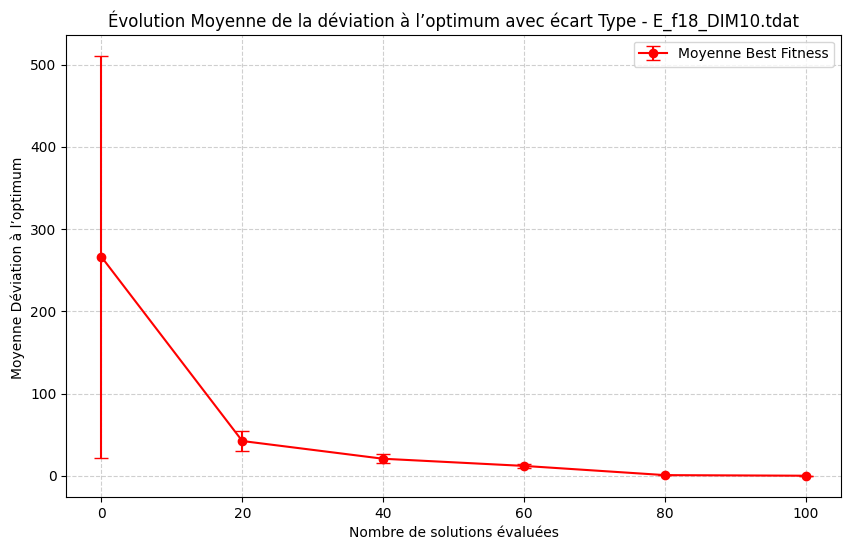

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

def extract_numbers_from_line(line):
    """Extrait tous les nombres d'une ligne sous forme de float."""
    return [float(num) for num in re.findall(r'-?\d+\.?\d*(?:[eE][-+]?\d+)?', line)]

def extract_runs(file_path):
    """Extrait les données des différentes runs du fichier."""
    try:
        with open(file_path, 'r') as file:
            all_runs = []
            best = []
            section_num = 0

            for line in file:
                if line.startswith('%'):
                    if best:
                        all_runs.append((section_num, best))
                        best = []
                    section_num += 1
                else:
                    numbers = extract_numbers_from_line(line)
                    if len(numbers) >= 3:
                        best.append(numbers[2])

            if best:
                all_runs.append((section_num, best))

        return all_runs

    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' est introuvable.")
        return []

def compute_stats_at_indices(all_runs, indices):
    """Calcule la moyenne et l'écart type des valeurs de 'best fitness' aux indices spécifiés."""
    mean_values = []
    std_values = []

    for idx in indices:
        values_at_idx = [run[1][idx] for run in all_runs if len(run[1]) > idx]
        if values_at_idx:
            mean_values.append(np.mean(values_at_idx))
            std_values.append(np.std(values_at_idx))
        else:
            mean_values.append(np.nan)
            std_values.append(np.nan)

    return mean_values, std_values

def plot_individual_runs(file_path, all_runs):
    """Affiche les runs individuels pour un fichier donné."""
    plt.figure(figsize=(12, 7))

    for section, data in all_runs:
        plt.plot(data, marker='o', linestyle='-', markersize=3, label=f"Run {section}")

    file_name = os.path.basename(file_path)  # On extrait juste le nom du fichier
    plt.title(f"Évolution de la déviation à l’optimum - {file_name}")
    plt.xlabel("Nombre de solutions évaluées")
    plt.ylabel("Déviation à l’optimum")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

def plot_mean_fitness_with_std(file_path, indices, mean_values, std_values):
    """Affiche la moyenne du Best Fitness avec l'écart type."""
    if not any(np.isfinite(mean_values)):
        print(f"Aucune donnée exploitable pour '{file_path}', le graphe ne sera pas affiché.")
        return

    file_name = os.path.basename(file_path)  # On extrait juste le nom du fichier
    plt.figure(figsize=(10, 6))
    plt.errorbar(indices, mean_values, yerr=std_values, fmt='-o', color='r', markersize=6, capsize=5, label="Moyenne Best Fitness")

    plt.title(f"Évolution Moyenne de la déviation à l’optimum avec écart Type - {file_name}")
    plt.xlabel("Nombre de solutions évaluées")
    plt.ylabel("Moyenne Déviation à l’optimum ")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Liste des fichiers à traiter
files_to_process = ["EDA-PSO/E_f18_DIM10.tdat"]

# Indices sélectionnés pour le calcul des moyennes
indices_to_check = [0, 20, 40, 60, 80, 100]

# Traitement de chaque fichier
for file_path in files_to_process:
    print(f"Traitement de '{os.path.basename(file_path)}'...")  # Affiche seulement le nom du fichier

    # Extraction des données
    all_runs = extract_runs(file_path)

    if all_runs:
        # Affichage des runs individuels
        plot_individual_runs(file_path, all_runs)

        # Calcul des statistiques
        mean_fitness_values, std_fitness_values = compute_stats_at_indices(all_runs, indices_to_check)

        # Affichage du graphe de la moyenne
        plot_mean_fitness_with_std(file_path, indices_to_check, mean_fitness_values, std_fitness_values)
    else:
        print(f"Aucune donnée valide pour '{os.path.basename(file_path)}', passage au suivant.")



🔹 Graphe pour les fichiers : R5_f3_DIM3.tdat, P_f3_DIM3.tdat, E_f3_DIM3.tdat


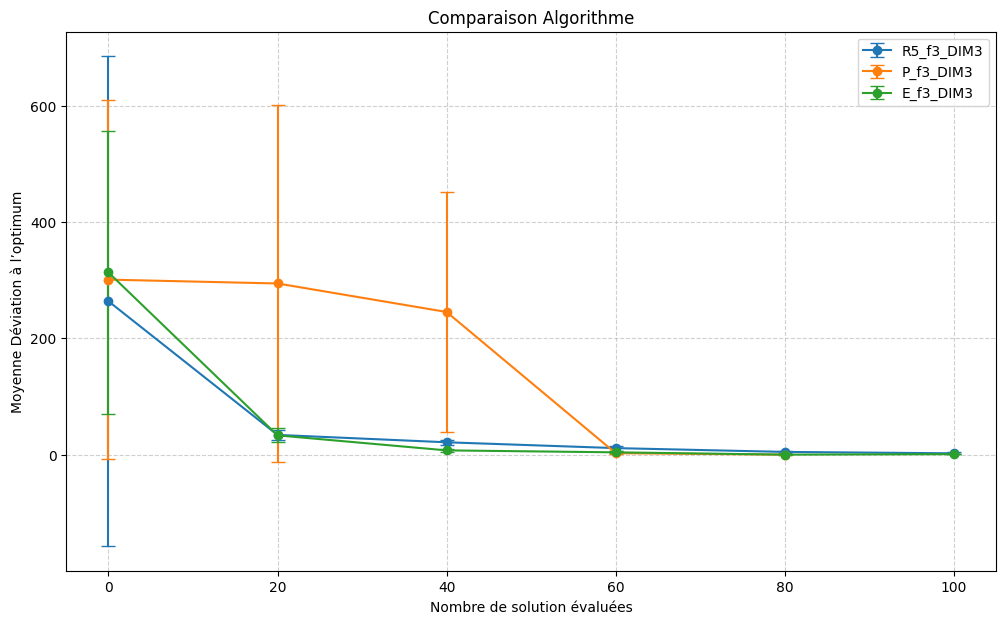


🔹 Graphe pour les fichiers : R5_f7_DIM3.tdat, P_f7_DIM3.tdat, E_f7_DIM3.tdat


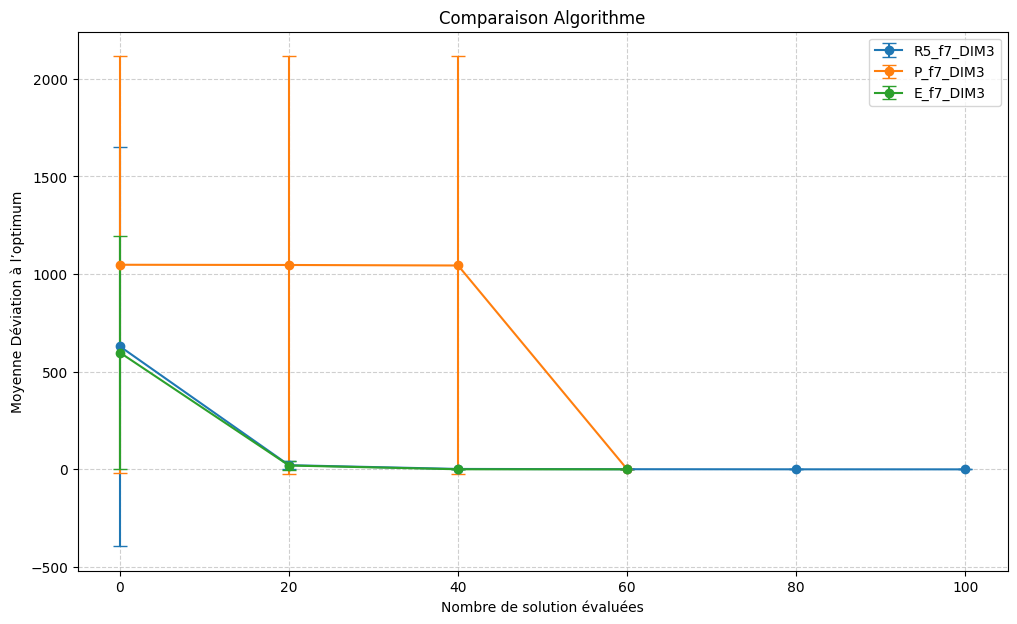


🔹 Graphe pour les fichiers : R5_f14_DIM3.tdat, P_f14_DIM3.tdat, E_f14_DIM3.tdat


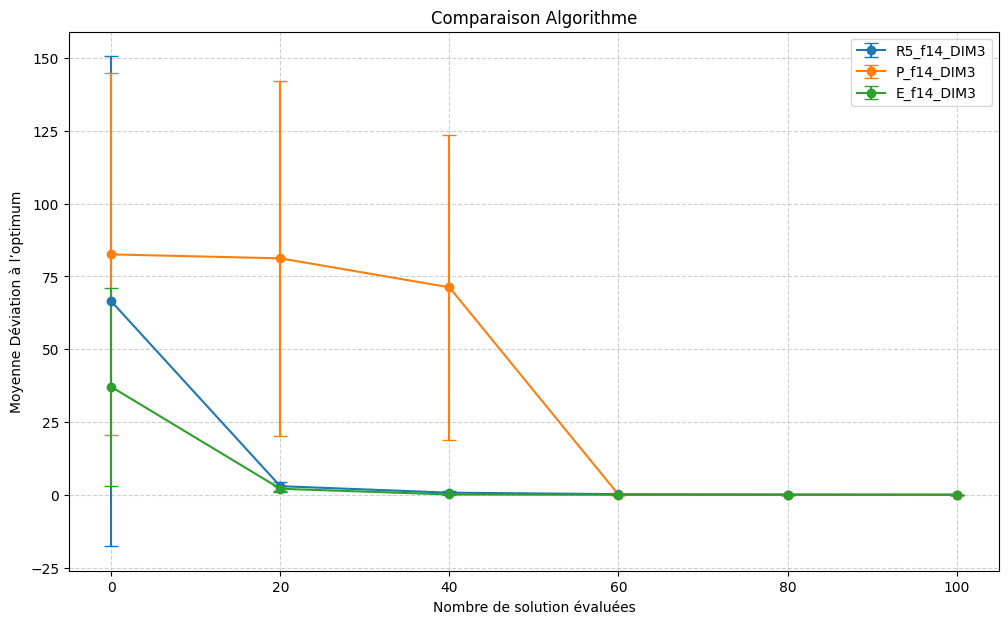


🔹 Graphe pour les fichiers : R5_f18_DIM3.tdat, P_f18_DIM3.tdat, E_f18_DIM3.tdat


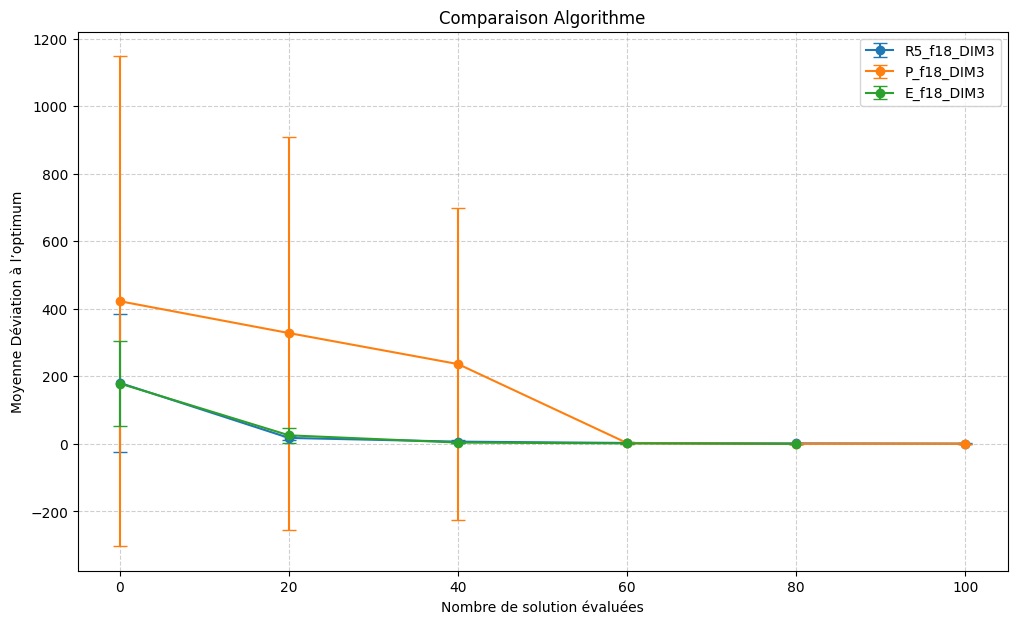


🔹 Graphe pour les fichiers : R5_f20_DIM3.tdat, P_f20_DIM3.tdat, E_f20_DIM3.tdat


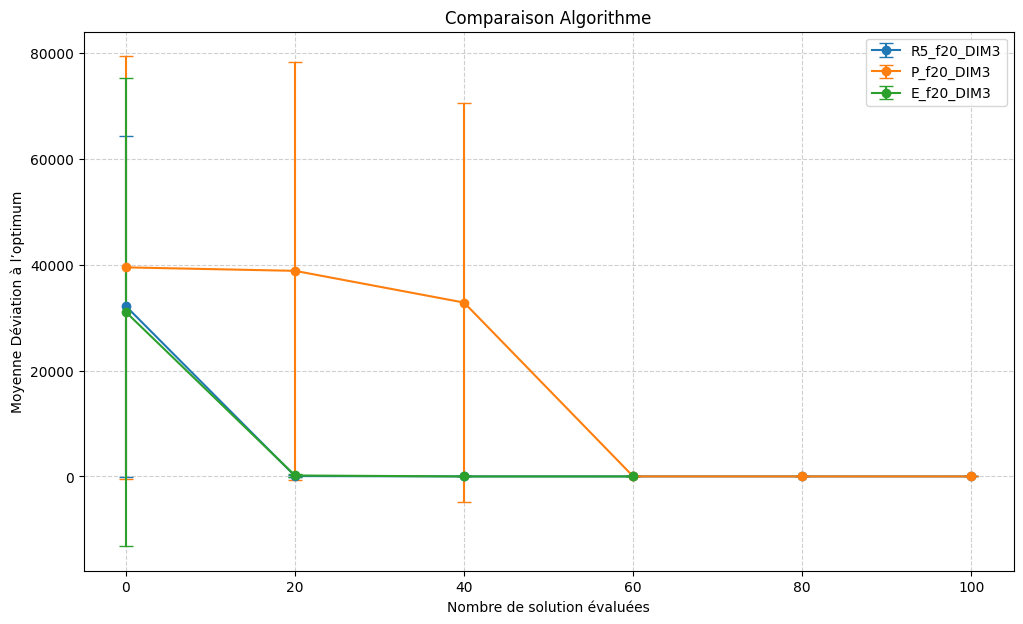

In [4]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

def extract_numbers_from_line(line):
    """Extrait tous les nombres d'une ligne sous forme de float."""
    return [float(num) for num in re.findall(r'-?\d+\.?\d*(?:[eE][-+]?\d+)?', line)]

def extract_runs(file_path):
    """Extrait les données des différentes runs du fichier."""
    try:
        with open(file_path, 'r') as file:
            all_runs = []
            best = []

            for line in file:
                if line.startswith('%'):
                    if best:
                        all_runs.append(best)
                        best = []
                else:
                    numbers = extract_numbers_from_line(line)
                    if len(numbers) >= 3:
                        best.append(numbers[2])

            if best:
                all_runs.append(best)

        return all_runs

    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' est introuvable.")
        return []

def compute_stats_at_indices(all_runs, indices):
    """Calcule la moyenne et l'écart type des valeurs de 'best fitness' aux indices spécifiés."""
    mean_values = []
    std_values = []

    for idx in indices:
        values_at_idx = [run[idx] for run in all_runs if len(run) > idx]
        if values_at_idx:
            mean_values.append(np.mean(values_at_idx))
            std_values.append(np.std(values_at_idx))
        else:
            mean_values.append(np.nan)
            std_values.append(np.nan)

    return mean_values, std_values

def plot_comparison(files, indices):
    """Affiche un graphe comparatif pour un groupe de 3 fichiers."""
    plt.figure(figsize=(12, 7))

    for file_path in files:
        all_runs = extract_runs(file_path)
        if not all_runs:
            print(f"Aucune donnée extraite pour '{file_path}', il sera ignoré.")
            continue

        mean_values, std_values = compute_stats_at_indices(all_runs, indices)

        if not any(np.isfinite(mean_values)):
            print(f"Aucune donnée exploitable pour '{file_path}', il sera ignoré.")
            continue

        # Extraire le nom du fichier sans le chemin et sans extension .tdat
        file_label = os.path.basename(file_path).replace(".tdat", "")

        plt.errorbar(indices, mean_values, yerr=std_values, fmt='-o', markersize=6, capsize=5, label=file_label)

    plt.title("Comparaison Algorithme")
    plt.xlabel("Nombre de solution évaluées")
    plt.ylabel("Moyenne Déviation à l’optimum")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Liste de tous les fichiers avec DIM3
all_files =[
    "R5/R5_f3_DIM3.tdat", "POEMS/P_f3_DIM3.tdat", "EDA-PSO/E_f3_DIM3.tdat",
    "R5/R5_f7_DIM3.tdat", "POEMS/P_f7_DIM3.tdat", "EDA-PSO/E_f7_DIM3.tdat",
    "R5/R5_f14_DIM3.tdat", "POEMS/P_f14_DIM3.tdat", "EDA-PSO/E_f14_DIM3.tdat",
    "R5/R5_f18_DIM3.tdat", "POEMS/P_f18_DIM3.tdat", "EDA-PSO/E_f18_DIM3.tdat",
    "R5/R5_f20_DIM3.tdat", "POEMS/P_f20_DIM3.tdat", "EDA-PSO/E_f20_DIM3.tdat"
]



# Indices sélectionnés
indices_to_check = [0, 20, 40, 60, 80, 100]

# Découper la liste en groupes de 3 fichiers et générer un graphe pour chaque groupe
for i in range(0, len(all_files), 3):
    files_subset = all_files[i:i+3]
    print(f"\n🔹 Graphe pour les fichiers : {', '.join([os.path.basename(f) for f in files_subset])}")
    plot_comparison(files_subset, indices_to_check)



🔹 Graphe pour les fichiers : R5_f3_DIM10.tdat, P_f3_DIM10.tdat, E_f3_DIM10.tdat


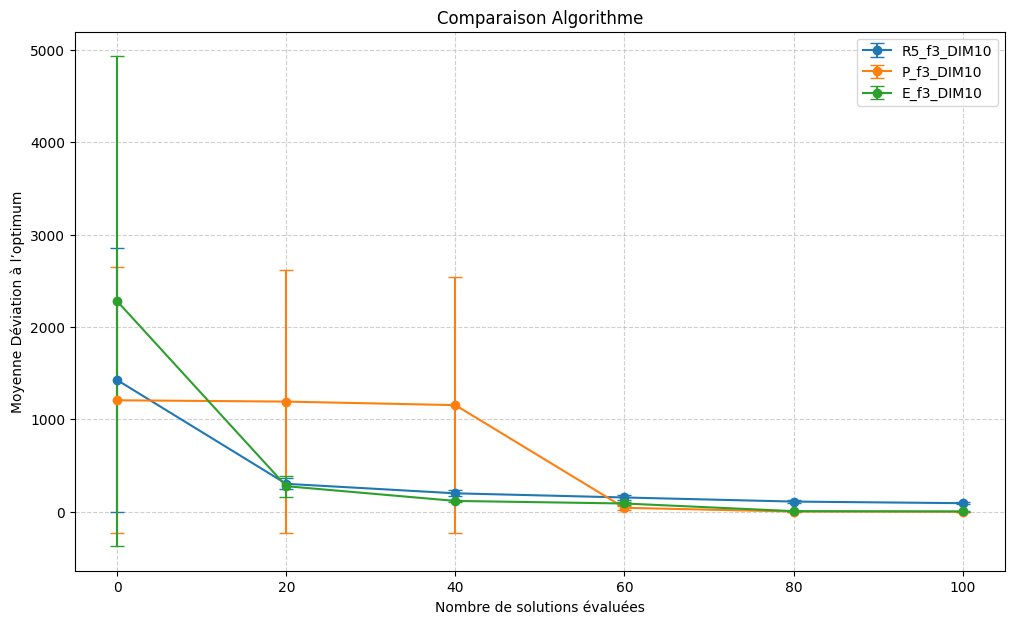


🔹 Graphe pour les fichiers : R5_f7_DIM10.tdat, P_f7_DIM10.tdat, E_f7_DIM10.tdat


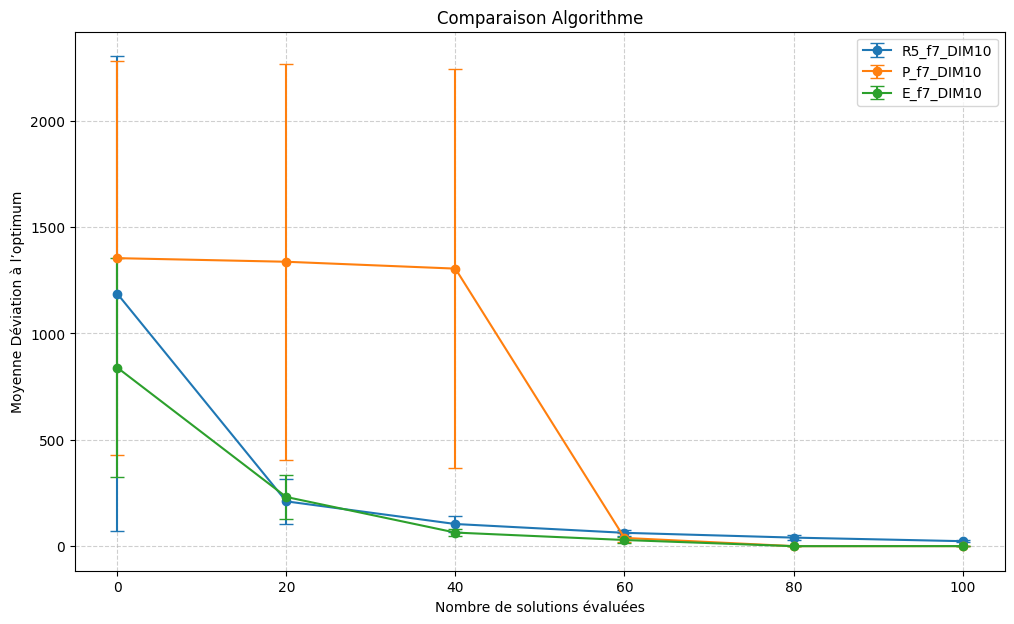


🔹 Graphe pour les fichiers : R5_f14_DIM10.tdat, P_f14_DIM10.tdat, E_f14_DIM10.tdat


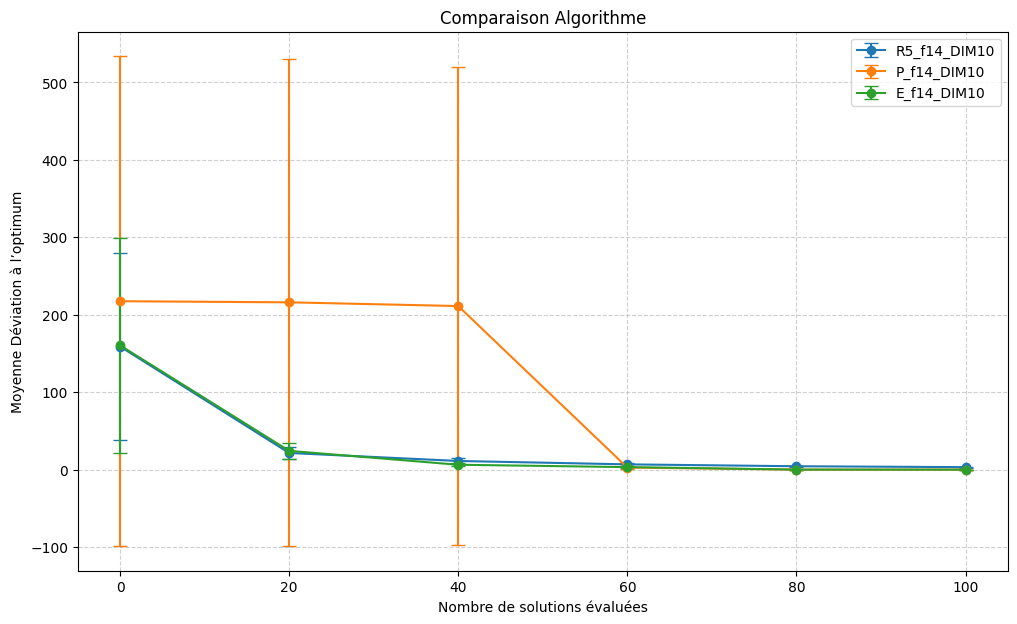


🔹 Graphe pour les fichiers : R5_f18_DIM10.tdat, P_f18_DIM10.tdat, E_f18_DIM10.tdat


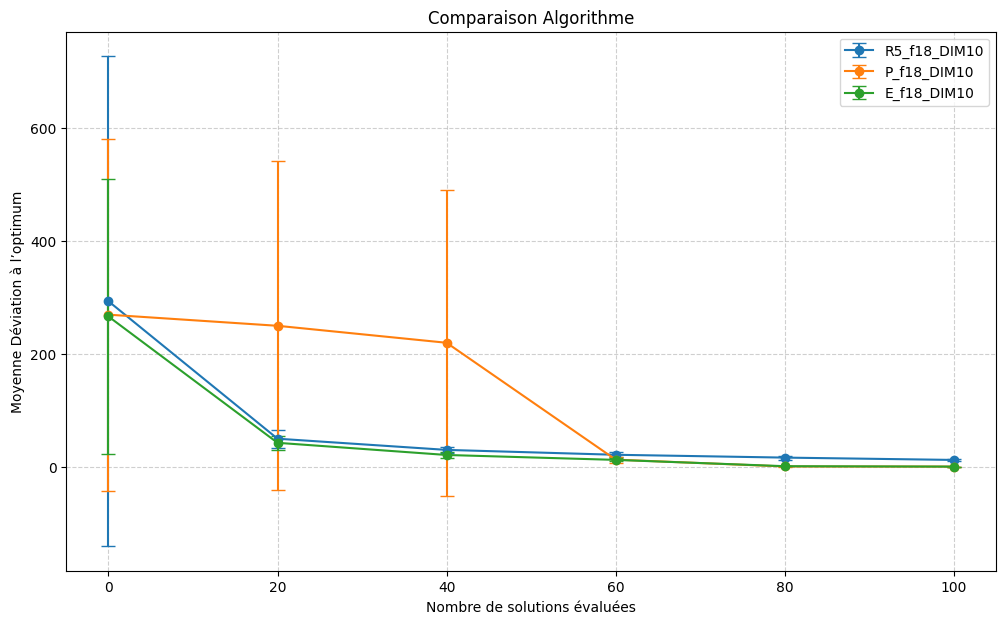


🔹 Graphe pour les fichiers : R5_f20_DIM10.tdat, P_f20_DIM10.tdat, E_f20_DIM10.tdat


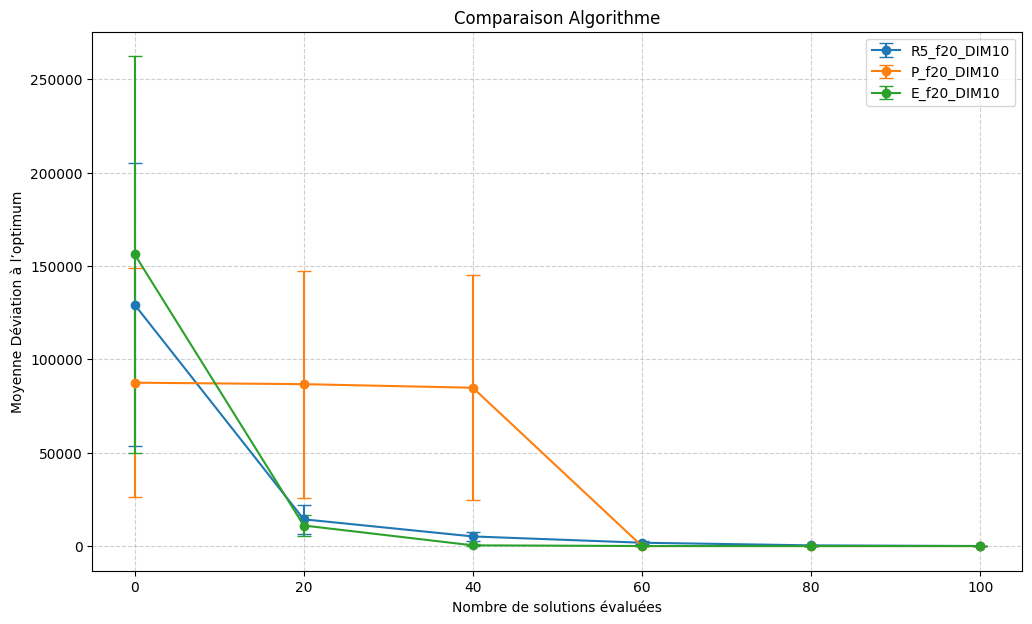

In [5]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

def extract_numbers_from_line(line):
    """Extrait tous les nombres d'une ligne sous forme de float."""
    return [float(num) for num in re.findall(r'-?\d+\.?\d*(?:[eE][-+]?\d+)?', line)]

def extract_runs(file_path):
    """Extrait les données des différentes runs du fichier."""
    try:
        with open(file_path, 'r') as file:
            all_runs = []
            best = []

            for line in file:
                if line.startswith('%'):
                    if best:
                        all_runs.append(best)
                        best = []
                else:
                    numbers = extract_numbers_from_line(line)
                    if len(numbers) >= 3:
                        best.append(numbers[2])

            if best:
                all_runs.append(best)

        return all_runs

    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' est introuvable.")
        return []

def compute_stats_at_indices(all_runs, indices):
    """Calcule la moyenne et l'écart type des valeurs de 'best fitness' aux indices spécifiés."""
    mean_values = []
    std_values = []

    for idx in indices:
        values_at_idx = [run[idx] for run in all_runs if len(run) > idx]
        if values_at_idx:
            mean_values.append(np.mean(values_at_idx))
            std_values.append(np.std(values_at_idx))
        else:
            mean_values.append(np.nan)
            std_values.append(np.nan)

    return mean_values, std_values

def plot_comparison(files, indices):
    """Affiche un graphe comparatif pour un groupe de 3 fichiers."""
    plt.figure(figsize=(12, 7))

    for file_path in files:
        all_runs = extract_runs(file_path)
        if not all_runs:
            print(f"Aucune donnée extraite pour '{file_path}', il sera ignoré.")
            continue

        mean_values, std_values = compute_stats_at_indices(all_runs, indices)

        if not any(np.isfinite(mean_values)):
            print(f"Aucune donnée exploitable pour '{file_path}', il sera ignoré.")
            continue

        # Extraire le nom du fichier sans le chemin et sans extension .tdat
        file_label = os.path.basename(file_path).replace(".tdat", "")

        plt.errorbar(indices, mean_values, yerr=std_values, fmt='-o', markersize=6, capsize=5, label=file_label)

    plt.title("Comparaison Algorithme")
    plt.xlabel("Nombre de solutions évaluées")
    plt.ylabel("Moyenne Déviation à l’optimum")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Liste de tous les fichiers avec DIM10
all_files = [
    "R5/R5_f3_DIM10.tdat", "POEMS/P_f3_DIM10.tdat","EDA-PSO/E_f3_DIM10.tdat",
    "R5/R5_f7_DIM10.tdat", "POEMS/P_f7_DIM10.tdat", "EDA-PSO/E_f7_DIM10.tdat",
    "R5/R5_f14_DIM10.tdat", "POEMS/P_f14_DIM10.tdat", "EDA-PSO/E_f14_DIM10.tdat",
    "R5/R5_f18_DIM10.tdat", "POEMS/P_f18_DIM10.tdat", "EDA-PSO/E_f18_DIM10.tdat",
    "R5/R5_f20_DIM10.tdat", "POEMS/P_f20_DIM10.tdat", "EDA-PSO/E_f20_DIM10.tdat"
]

# Indices sélectionnés
indices_to_check = [0, 20, 40, 60, 80, 100]

# Découper la liste en groupes de 3 fichiers et générer un graphe pour chaque groupe
for i in range(0, len(all_files), 3):
    files_subset = all_files[i:i+3]
    print(f"\n🔹 Graphe pour les fichiers : {', '.join([os.path.basename(f) for f in files_subset])}")
    plot_comparison(files_subset, indices_to_check)



🔹 Graphe pour les fichiers : R5_f3_DIM20.tdat, P_f3_DIM20.tdat, E_f3_DIM20.tdat


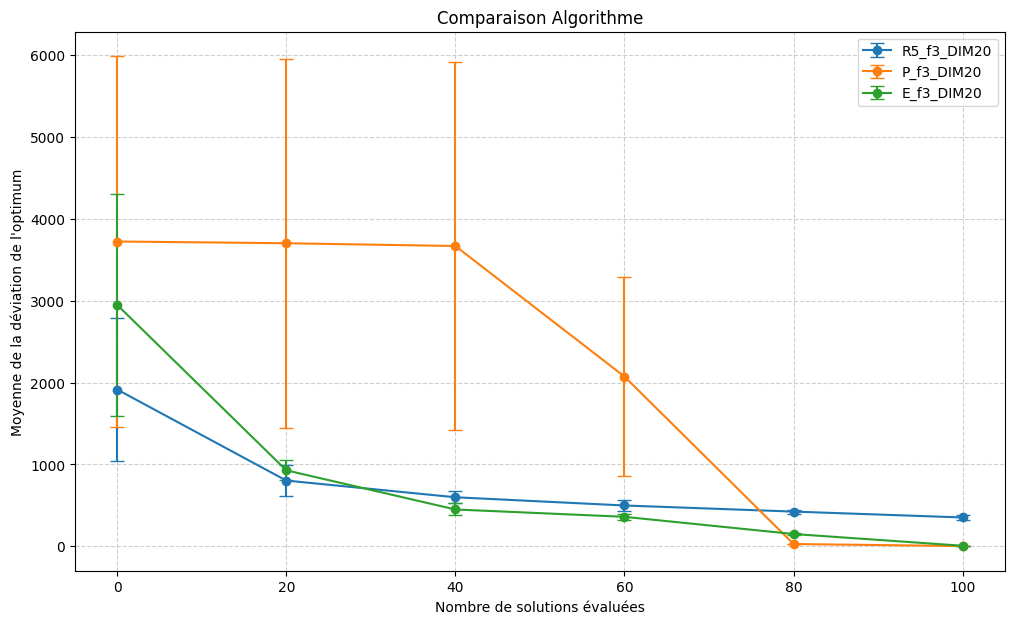


🔹 Graphe pour les fichiers : R5_f7_DIM20.tdat, P_f7_DIM20.tdat, E_f7_DIM20.tdat


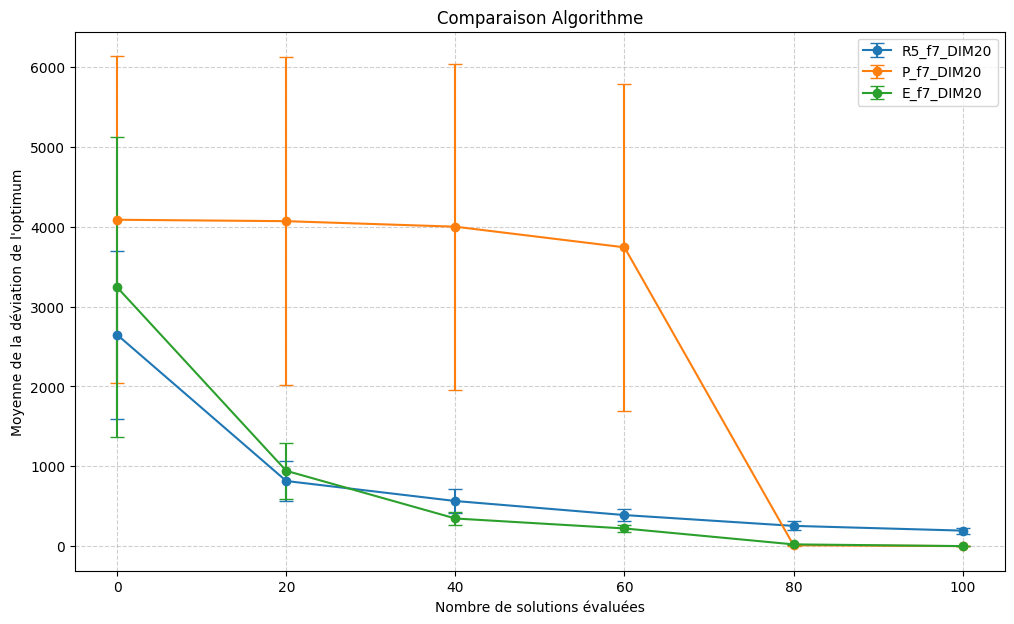


🔹 Graphe pour les fichiers : R5_f14_DIM20.tdat, P_f14_DIM20.tdat, E_f14_DIM20.tdat


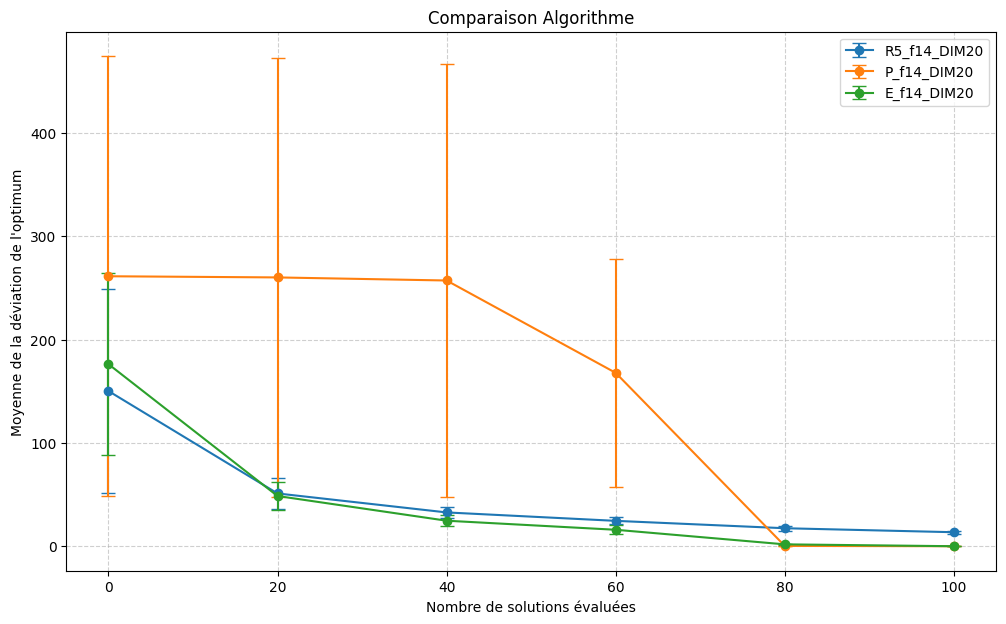


🔹 Graphe pour les fichiers : R5_f18_DIM20.tdat, P_f18_DIM20.tdat, E_f18_DIM20.tdat


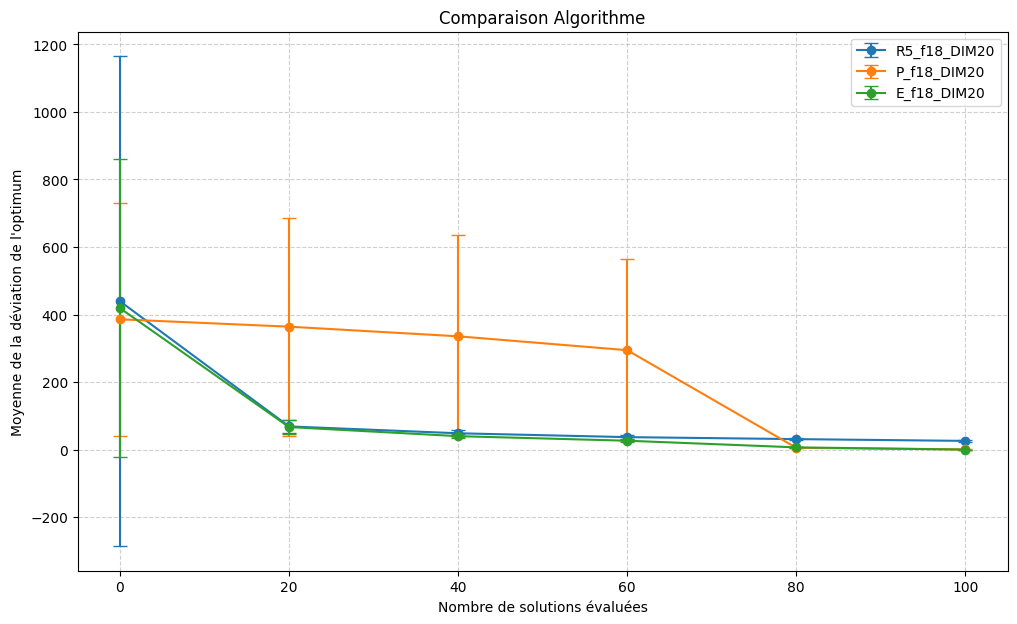


🔹 Graphe pour les fichiers : R5_f20_DIM20.tdat, P_f20_DIM20.tdat, E_f20_DIM20.tdat
Erreur : le fichier '/content/drive/MyDrive/EDA-PSO/E_f20_DIM20.tdat' est introuvable.
Aucune donnée extraite pour '/content/drive/MyDrive/EDA-PSO/E_f20_DIM20.tdat', il sera ignoré.


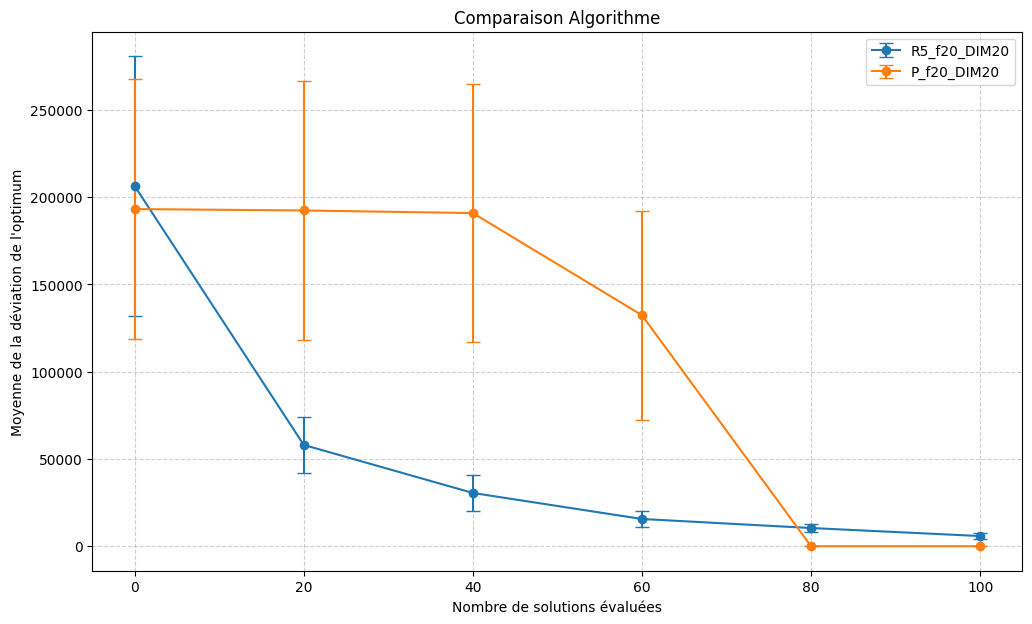

In [6]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

def extract_numbers_from_line(line):
    """Extrait tous les nombres d'une ligne sous forme de float."""
    return [float(num) for num in re.findall(r'-?\d+\.?\d*(?:[eE][-+]?\d+)?', line)]

def extract_runs(file_path):
    """Extrait les données des différentes runs du fichier."""
    try:
        with open(file_path, 'r') as file:
            all_runs = []
            best = []

            for line in file:
                if line.startswith('%'):
                    if best:
                        all_runs.append(best)
                        best = []
                else:
                    numbers = extract_numbers_from_line(line)
                    if len(numbers) >= 3:
                        best.append(numbers[2])

            if best:
                all_runs.append(best)

        return all_runs

    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' est introuvable.")
        return []

def compute_stats_at_indices(all_runs, indices):
    """Calcule la moyenne et l'écart type des valeurs de 'best fitness' aux indices spécifiés."""
    mean_values = []
    std_values = []

    for idx in indices:
        values_at_idx = [run[idx] for run in all_runs if len(run) > idx]
        if values_at_idx:
            mean_values.append(np.mean(values_at_idx))
            std_values.append(np.std(values_at_idx))
        else:
            mean_values.append(np.nan)
            std_values.append(np.nan)

    return mean_values, std_values

def plot_comparison(files, indices):
    """Affiche un graphe comparatif pour un groupe de 3 fichiers."""
    plt.figure(figsize=(12, 7))

    for file_path in files:
        all_runs = extract_runs(file_path)
        if not all_runs:
            print(f"Aucune donnée extraite pour '{file_path}', il sera ignoré.")
            continue

        mean_values, std_values = compute_stats_at_indices(all_runs, indices)

        if not any(np.isfinite(mean_values)):
            print(f"Aucune donnée exploitable pour '{file_path}', il sera ignoré.")
            continue

        # Extraire le nom du fichier sans le chemin et sans extension .tdat
        file_label = os.path.basename(file_path).replace(".tdat", "")

        plt.errorbar(indices, mean_values, yerr=std_values, fmt='-o', markersize=6, capsize=5, label=file_label)

    plt.title("Comparaison Algorithme")
    plt.xlabel("Nombre de solutions évaluées")
    plt.ylabel("Moyenne de la déviation de l'optimum")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Liste de tous les fichiers avec DIM20
all_files = [
    "R5/R5_f3_DIM20.tdat", "POEMS/P_f3_DIM20.tdat", "EDA-PSO/E_f3_DIM20.tdat",
    "R5/R5_f7_DIM20.tdat", "POEMS/P_f7_DIM20.tdat", "EDA-PSO/E_f7_DIM20.tdat",
    "R5/R5_f14_DIM20.tdat", "POEMS/P_f14_DIM20.tdat", "EDA-PSO/E_f14_DIM20.tdat",
    "R5/R5_f18_DIM20.tdat", "POEMS/P_f18_DIM20.tdat", "EDA-PSO/E_f18_DIM20.tdat",
    "R5/R5_f20_DIM20.tdat", "POEMS/P_f20_DIM20.tdat", "ttEDA-PSO/E_f20_DIM20.tdat"
]

# Indices sélectionnés
indices_to_check = [0, 20, 40, 60, 80, 100]

# Découper la liste en groupes de 3 fichiers et générer un graphe pour chaque groupe
for i in range(0, len(all_files), 3):
    files_subset = all_files[i:i+3]
    print(f"\n🔹 Graphe pour les fichiers : {', '.join([os.path.basename(f) for f in files_subset])}")
    plot_comparison(files_subset, indices_to_check)
